### MNIST DS

#### Get Dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.externals import joblib

%matplotlib inline

In [16]:
#func
def test_model(model,name):
    model.fit(X_train, y_train) 
    scoring = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=3)
    print (name + " Acc = ", metrics.accuracy_score(y_train,model.predict(X_train)), ", Mean = ",scoring.mean())
    
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label='Accuracy')
    plt.plot(thresholds, recalls[:-1],"g--",label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

In [3]:
#read data
train = pd.read_csv('mnist_train.csv',header=None)
test = pd.read_csv('mnist_test.csv',header=None)

In [4]:
#split
X_train = train.drop(0,axis=1)
y_train = train[0]
X_test = test.drop(0,axis=1)
y_test = test[0]

#### SGD 5Th

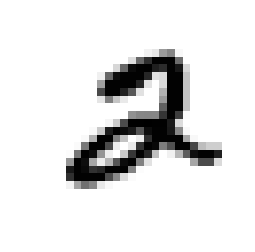

In [34]:
#view some image
some_digit = X_train.values[5]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [31]:
#Fit
y_train_5 = (y_train == 5)
y_test_5 = (y_train == 5)

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train,y_train_5)

In [ ]:
#Score
y_train_pred = cross_val_predict(sgd,X_train,y_train_5,cv=3)

print("Cross val acc = ",cross_val_score(sgd, X_train,y_train_5,cv=3,scoring='accuracy'))
print("F1 = ",metrics.f1_score(y_train_5, y_train_pred))
print("Confusion matrix ", metrics.confusion_matrix(y_train_5,y_train_pred))

#52992 - true negative
#4347 - true positive
#1587 - false positive
#1074 - false negative

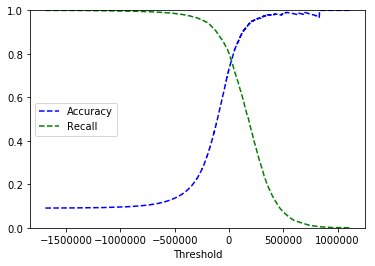

In [43]:
#Threshold
y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3, method="decision_function")

precisions,recall,thresholds = metrics.precision_recall_curve(y_train_5, y_scores)
plot_precision_recall_vs_threshold(precisions,recall,thresholds)

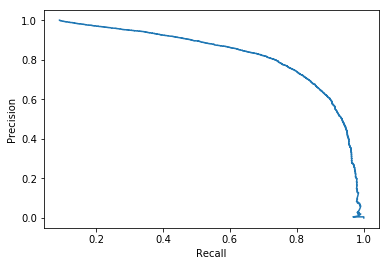

In [46]:
#Precision vs recall
plt.plot(precisions[:-1], recall[:-1])
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

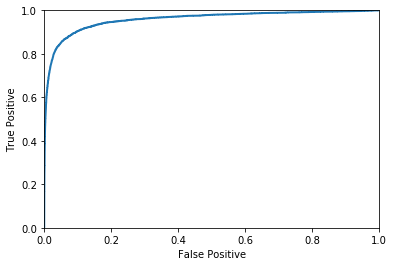

In [48]:
#ROC
fpr, tpr, thresholds = metrics.roc_curve(y_train_5,y_scores)
plt.plot(fpr,tpr,linewidth=2)
plt.axis([0,1,0,1])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()

####  Forest

In [49]:
#Fit
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([2], dtype=int64)

In [51]:
#Score
y_train_pred = cross_val_predict(forest_clf,X_train,y_train,cv=3)

print("Cross val acc = ",cross_val_score(forest_clf, X_train,y_train,cv=3,scoring='accuracy'))
print("F1 = ",metrics.f1_score(y_train, y_train_pred, average="micro"))

Cross val acc =  [ 0.94116177  0.93949697  0.94374156]
F1 =  0.941466666667


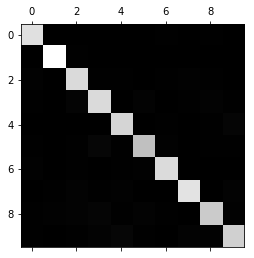

In [52]:
#Score 2
conf_mx = metrics.confusion_matrix(y_train,y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### KNN

In [53]:
#Fit
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
#Score
y_train_pred = cross_val_predict(knn_clf,X_train,y_train,cv=3)

print("Cross val acc = ",cross_val_score(knn_clf, X_train,y_train,cv=3,scoring='accuracy'))
print("F1 = ",metrics.f1_score(y_train, y_train_pred, average="micro"))

Cross val acc =  [ 0.96760648  0.96704835  0.96754513]
F1 =  0.9674


In [56]:
#Dump model
joblib.dump(knn_clf,"knn_clf.pkl")

['knn_clf.pkl']